In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# cleaning the data
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [5]:
df[['Glucose', 'BloodPressure', 'SkinThickness',
   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = \
df[['Glucose', 'BloodPressure', 'SkinThickness',
   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [6]:
df.fillna(df.mean(), inplace=True)

In [7]:
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
corr = df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

<ipython-input-9-de1c070a8d84>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


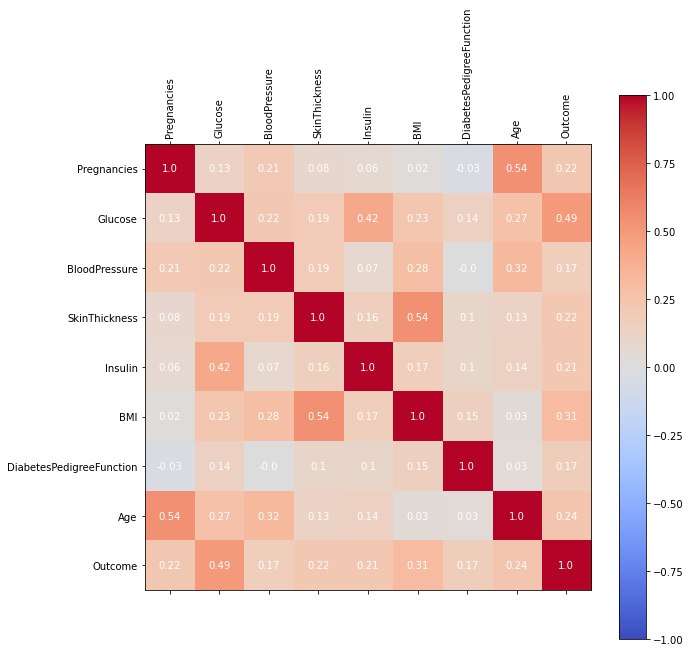

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax =plt.subplots(figsize=(10,10))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation=90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j,i,round(corr.iloc[i][j],2),
                      ha="center", va="center", color="w")
plt.show()

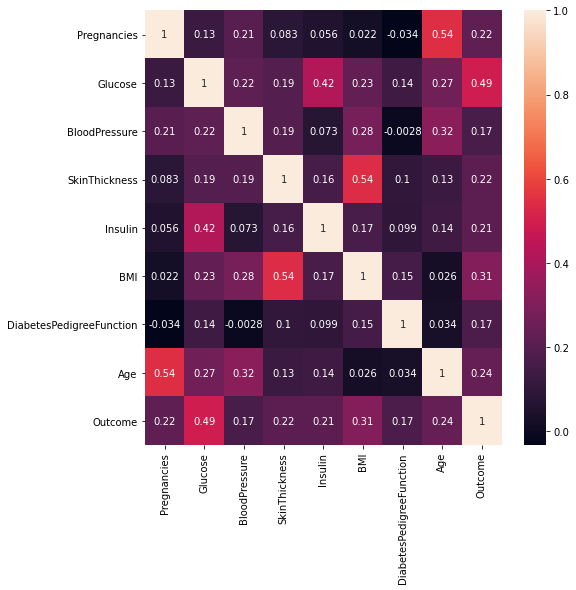

In [10]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(8,8)

In [11]:
# gtet the top 4 features with the highest correlation with outcome

print(df.corr().nlargest(4,'Outcome').index)

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


In [12]:
print(df.corr().nlargest(4, 'Outcome').values[:,8])

[1.         0.49292767 0.31192439 0.23835598]


In [13]:
# Logistic Regression

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# features
X = df[['Glucose','BMI','Age']]

#label
y = df.iloc[:,8]

log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
                                   scoring ='accuracy').mean()
print(log_regress_score)

0.7669856459330144


In [14]:
result = []
result.append(log_regress_score)

In [15]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# empty list that will hold cv scores
cv_scores = []

# number of folds
folds = 10

ks = list(range(1,int(len(X)*((folds-1)/folds)),2))

#perform k fold cross validation
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)

knn_score = max(cv_scores)
optimal_k = ks[cv_scores.index(knn_score)]

print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 19
0.7721462747778537


In [16]:
# Support Vector Machines

from sklearn import svm

linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
                                  cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.7656527682843473


In [17]:
# with RBF kernel
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.765704032809296


In [18]:
# selecting the best perfomring 

algorithms=['Logistic Regression', 'K Nearest Neighbors', 'SVM Linear Kernel', 'SVM RBF Kernel']
cv_mean = pd.DataFrame(result,index= algorithms)
cv_mean.columns=['Accuracy']
cv_mean.sort_values(by='Accuracy', ascending=False)

,Accuracy
K Nearest Neighbors,0.772146
Logistic Regression,0.766986
SVM RBF Kernel,0.765704
SVM Linear Kernel,0.765653


In [20]:
# training and saving the model. best model is KNN w/ k=19, now train model with entire dataset

knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [21]:
# save to disk to retrive later
import pickle
filename = 'diabetes.sav'
#write to file using write and binary mode
pickle.dump(knn, open(filename, 'wb'))

In [22]:
loaded_model = pickle.load(open(filename, 'rb'))

In [23]:
Glucose = 65
BMI=70
Age=50
prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print("Non-diabetic")
else:
    print("Diabetic")

[0]
Non-diabetic


C:\Users\dougl\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [24]:
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0])*100 ,2)) + "%")

[[0.94736842 0.05263158]]
Confidence: 94.74%


C:\Users\dougl\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Deploying the model as a REST API

In [25]:
# !pip install flask

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dougl\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


In [ ]:
import pickle
from flask import Flask, request, json, jsonify
app = Flask(__name__)

filename = 'diabetes.sav'
loaded_model = pickle.load(open(filename, 'rb'))

@app.route('/diabetes/v1/predict', methods=['POST'])
def predict():
    features=request.json
    features_list = [features['Glucose'],
                    features['BMI'],
                    features['Age']]
    prediction = loaded_model.predict([features_list])
    confidence = loaded_model.predict_proba([features_list])
    
    response={}
    response['prediction'] = int(prediction[0])
    response['confidence'] = str(round(np.amax(confidence[0])*100, 2))
    return jsonify(response)

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.0.13:5000/ (Press CTRL+C to quit)
192.168.0.13 - - [22/Jan/2022 03:47:28] "GET / HTTP/1.1" 404 -
192.168.0.13 - - [22/Jan/2022 03:47:28] "GET /favicon.ico HTTP/1.1" 404 -
